## Guide for Plotly for beginners

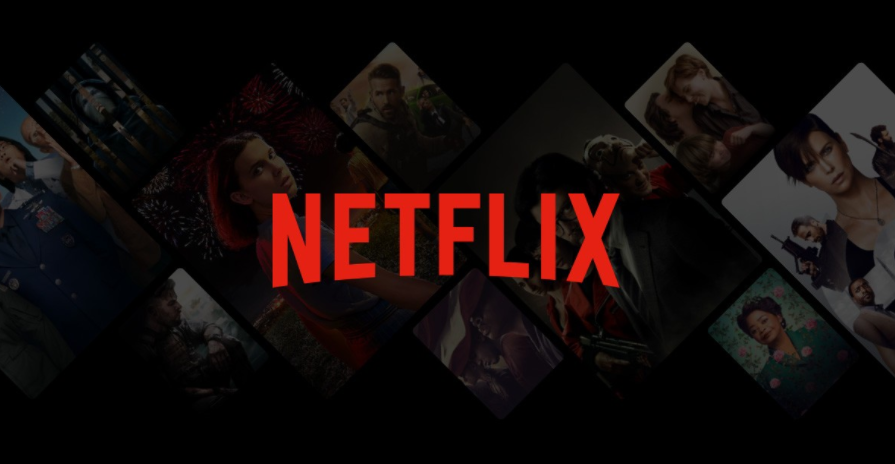

# All you need to know is Plotly!
Here we will see 10 different graphs with some basic and advanced graphs like **waterfall** and **bidirectional Bar Chart** with every parameters explained.<br>
#### If you find this kernel useful kindly upvote it i have invested a lot time in this

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from IPython.core.display import display, HTML, Javascript
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [ ]:
html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
    <style>
    .h2{
    color: white;
    }
    
    .toc h2{
        color: white;
        background: #3f4d63;
        font-weight: 500;
        font-family: Robot;
        font-size: 22px;
        padding: 6px 12px;
        margin-bottom: 2px;
        text-align: center;
    }
    
    .toc h3{
        color: white;
        background: #3f4d63;
        font-weight: 300;
        font-family: Robot;
        font-size: 20px;
        padding: 6px 12px;
        margin-bottom: 2px;
        text-align: center;
    }
    
    .toc ol li{
        list-style:none;
        line-height:normal;
        }
     
    .toc li{
        background: #235f83;
        color: white;
        font-weight: 500;
        font-family: Helvetica;
        font-size: 17px;
        margin-bottom: 2px;
        padding: 6px 12px;
    }

    .toc ol ol li{
        background: #fff;
        color: #4d4d4d;
        font-weight: 400;
        font-size: 15px;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        margin-top: 0px;
        margin-bottom: 0px;
        padding: 3px 12px;
    }  
    </style>
    </head>
    <body>
        <div class="toc">
        
        <ol> 
        <h2> Table of Contents </h2>
        <li>1. Data </li> 
        <li>2. Data Description</li>
        <li>3. Data Cleaning</li>
        <li>4. Data Visualization</li>
        <ol> 
            <li>4.1 Pie Chart </li>
            <li>4.2 Donught Chart </li>
            <li>4.2 Histogram Chart </li>
            <li>4.3 Bar Chart </li>
                <ol>
                    <li>4.3.1 Normal Bar Chart </li>
                    <li>4.3.2 Stacked Bar Chart </li>
                    <li>4.3.3 Group Bar Chart </li>
                    <li>4.3.4 Bidirectional Bar Chart </li>
                 </ol> 
            </li>
            <li>4.4 Funnel Chart </li>
            <li>4.5 Bubble Chart </li>
            <li>4.6 Line Chart </li>
            <li>4.7 TreeMap Chart</li>
            <li>4.8 WaterFall chart </li>
            <li>4.9 Boxplot </li>
            <li>4.10 HetaMap </li>
         </ol>   
        <li>5. Conclusion</li>
         </div>
    </body>
</html>
"""

HTML(html_contents)

<body>
    <div class="toc">
       <H2> Data  </H2>
</body>

In [ ]:
df = pd.read_csv(r'../input/netflix-shows/netflix_titles.csv')
df.head(3)

<body>
    <div class="toc">
       <H2> Data Description </H2>
</body>
    
    This dataset contains data about movies and tv show with different countries, release yaer and directors and more features

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

<body>
    <div class="toc">
       <H2> Data Cleaning </H2>
</body>

In [ ]:
df = df.dropna( how='any',subset=['cast', 'director'])

In [ ]:
# Replacing null values with 'missing'
df['country'].fillna('Missing',inplace=True)
df['date_added'].fillna('Missing',inplace=True)
df['rating'].fillna('Missing',inplace=True)

df.isnull().sum().sum()

In [ ]:
# converting into proper date time format
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
# finding seasons from durations
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [ ]:
df = df.rename(columns={"listed_in":"genre"})
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])
df['genre'].head()

<body>
    <div class="toc">
       <H2> Data Visualization </H2>
</body>

## Parameters Commonly Used: 

#### Basic Parameters: 
* **height, width:** Giving height & width of the chart respectively
* **color_discrete_sequence:** Specifying which colors you want in your chart
* **margin:** By setting values of Top, Bottom, Left, and Right you can change the margin of the graph
* **plot_bgcolor:** Plotly provides different templates and themes you can use that also or you can create your own theme.
* **showgrid:** The grid lines which are present in the chart. You can hide it by showgrid=False

#### Advanced Parameters:
* **categoryorder:** If you want your chart to show in ascending or decsending order you can specify values here 
* **hovermode:** While hovering on the bar you can specify in which mode you want like x hovermode or y hovermode.
* **hovertemplate:** While hovering on the data you can specify a format like how you want to look the data
* **xaxis_title, yaxis_title:** Specify the xaxis title & yaxis title respectively<br><br>

* **title:** Giving a Title of the chart

* **title_font**
    * **size:** Setting the font size of the title
    * **color:** Setting the color of the title
    * **family:** Setting the font-family of the title<br><br>

* **font**
    * **size:** Setting the font size of font in chart 
    * **color:** Setting the color of font in chart
    * **family:** Setting the font-family of the font in chart<br><br>

* **hoverlabel**
    * **bgcolor:** Setting the background color of the hoverlabels in chart
    * **font_size:** Setting the font-size of the hoverlabels in chart
    * **font_family:** Setting the font-family of the hoverlabels in chart 

<body>
    <div class="toc">
       <H2> Pie Chart </H2>
</body>

In [ ]:
fig_pie = px.pie(df, names='type', height=300, width=600, title='Most watched shows on Netflix', 
                 color_discrete_sequence=['#b20710', '#221f1f'])
fig_pie.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', 
                      rotation=90, pull=[0.6, 0])
fig_pie.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,
                      plot_bgcolor='#333', paper_bgcolor='#333',
                      title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                      font=dict(size=17, color='#8a8d93'),
                      hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

> #### Parameters:
**textposition:** The values of Movie & TV Show are shown outside of the chart by giving textposition=outside <br>
**textinfo:** What information you want to shown while hovering on the chart is specified here<br>
**rotation:** Giving different rotation to the chart to make chart presentable<br>
**pull:** What data and percent of data you want to pull you specified here<br>
**showlegend:** <br>
    * showlegend=**True** If you want to show the legends then do<br>
    * showlegend=**False** If you dont want to show the legends then do

<body>
    <div class="toc">
       <H2>4.2 Donut Chart </H2>
</body>

In [ ]:
fig_donut = px.pie(df, names='type', height=300, width=600, hole=0.7, title='Most watched on Netflix',
                   color_discrete_sequence=['#b20710', '#221f1f'])
fig_donut.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=90)
fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,
                        plot_bgcolor='#333', paper_bgcolor='#333',
                        title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                        font=dict(size=17, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

> Parameters:<br>
**hole:** You can specify any values between 0 to 1 to make hole. 

<body>
    <div class="toc">
       <H2>4.3 Histogram Chart </H2>
</body>

In [ ]:
fig_hist = px.histogram(df, y='rating', title='Distribution of Rating', color_discrete_sequence=['#b20710'])
fig_hist.update_xaxes(showgrid=False)
fig_hist.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig_hist.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_hist.update_layout(margin=dict(t=80, b=0, l=70, r=40),
                       hovermode="y unified", 
                       xaxis_title=' ', yaxis_title=" ",
                       plot_bgcolor='#333', paper_bgcolor='#333',
                       title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                       font=dict(color='#8a8d93'),
                       hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

> #### parameters:<br>
**ticksuffix:** When you want your labels of X/Y axis to have space between the line (white).<br>
**marker:** The primary color of the bar chart is red but if you dont specify the line with size then a white bar line will appear on the bars. 

<body>
    <div class="toc">
       <H2>4.4 Bar Chart </H2>
</body>

In [ ]:
df_rating = pd.DataFrame(df['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'count'})
df_rating[:2]

In [ ]:
fig_bar = px.bar(df_rating, y='rating', x='count', title='Distribution of Rating',
                 color_discrete_sequence=['#b20710'], text='count')
fig_bar.update_xaxes(showgrid=False)
fig_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),
                      hovermode="y unified", 
                      xaxis_title=' ', yaxis_title=" ",
                      plot_bgcolor='#333', paper_bgcolor='#333',
                      title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                      font=dict(color='#8a8d93'),
                      legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                      hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

> #### Parameters:
**text:** Text will show the numerical value on the primary bars.

<body>
    <div class="toc">
       <H2>4.3.2 Stacked Bar Chart </H2>
</body>

In [ ]:
fig_stack_bar = px.histogram(df, y='rating', color='type', title='Which has the highest Rating TV shows or Movies?',
                             color_discrete_sequence=['#b20710', 'orange'])
fig_stack_bar.update_xaxes(showgrid=False)
fig_stack_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig_stack_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_stack_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),
                            hovermode="y unified", 
                            xaxis_title=' ', yaxis_title=" ",
                            plot_bgcolor='#333', paper_bgcolor='#333',
                            title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                            font=dict(color='#8a8d93'),
                            legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                            hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

> #### Parameters: <br>
**orientation:** chnage the orientation of chart in horizontal or vertical<br> 
**yanchor, xanchor:** Setting if you want the legends in top, bottom, center,etc<br>
**x, y:** Setting the x and y values for the legend<br>

<body>
    <div class="toc">
       <H2>4.3.3 Group Bar Chart </H2>
</body>

In [ ]:
fig_group_bar = px.histogram(df, y='rating', color='type', title='Which has the highest Rating TV shows or Movies?',
                             color_discrete_sequence=['#b20710', 'orange'], barmode='group')
fig_group_bar.update_xaxes(showgrid=False)
fig_group_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig_group_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_group_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),
                            hovermode="y unified", 
                            xaxis_title=' ', yaxis_title=" ",
                            plot_bgcolor='#333', paper_bgcolor='#333',
                            title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                            font=dict(color='#8a8d93'),
                            legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                            hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

> #### Parameters:<br>
barmode: There are 4 values for barmode; stack, group, relatvie, overlay

<body>
    <div class="toc">
       <H2>4.3.4 Bidirectional Bar Chart </H2>
</body>

In [ ]:
# making a copy of df
dff = df.copy()

# making 2 df one for tv show and another for movie with rating 
df_tv_show = dff[dff['type']=='TV Show'][['rating', 'type']].rename(columns={'type':'tv_show'})
df_movie = dff[dff['type']=='Movie'][['rating', 'type']].rename(columns={'type':'movie'})


df_tv_show = pd.DataFrame(df_tv_show.rating.value_counts()).reset_index().rename(columns={'index':'tv_show'})
df_tv_show['rating_final'] = df_tv_show['rating'] 
# making rating column value negative
df_tv_show['rating'] *= -1


df_movie = pd.DataFrame(df_movie.rating.value_counts()).reset_index().rename(columns={'index':'movie'})

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True, horizontal_spacing=0)
# bar plot for tv shows
fig.append_trace(go.Bar(x=df_tv_show.rating, y=df_tv_show.tv_show, orientation='h', showlegend=True, 
                        text=df_tv_show.rating_final, name='TV Show', marker_color='#221f1f'), 1, 1)
# bar plot for movies
fig.append_trace(go.Bar(x=df_movie.rating, y=df_movie.movie, orientation='h', showlegend=True, text=df_movie.rating,
                        name='Movie', marker_color='#b20710'), 1, 2)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(title='Which has the highest rating TV shows or Movies?',
                  margin=dict(t=80, b=0, l=70, r=40),
                  hovermode="y unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
fig.add_annotation(dict(x=0.81, y=0.6, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "<b>97%</b> people prefer Movies over TV Shows on Netflix.<br> Large number of people watch TV-MA rating  <br> Movies which are for mature audience."
                  ))
fig.add_annotation(dict(x=0.2, y=0.2, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "<b>3%</b> people prefer TV Shows on Netflix.<br> There is no inappropriate content for<br> ages 17 and under in TV Shows."
                  ))

Here, I have made 2 bar charts one for TV Shows and another for Movies and they are sharing same y-axis. 
> #### Parameters:<br>
**add_annotation**<br>
**x, y:** Setting the values of x,y for showing the text<br>
**text:** Add the text which you want to show on the chart

<body>
    <div class="toc">
       <H2>4.4 Funnel Chart </H2>
</body>

In [ ]:
df_month = pd.DataFrame(df.month_added.value_counts()).reset_index().rename(columns={'index':'month','month_added':'count'})
# converting month no to month name
df_month['month_final'] = df_month['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df_month[:2]

In [ ]:
fig_month = px.funnel(df_month, x='count', y='month_final', title='Best month for releasing Content',
                      height=350, width=600, color_discrete_sequence=['#b20710'])
fig_month.update_xaxes(showgrid=False, ticksuffix=' ', showline=True)
fig_month.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_month.update_layout(margin=dict(t=60, b=20, l=70, r=40),
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#333', paper_bgcolor='#333',
                        title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

<body>
    <div class="toc">
       <H2>4.5 Bubble Chart </H2>
</body>

In [ ]:
df_iris = px.data.iris()
fig_iris = px.scatter(df_iris, x="sepal_width", y="sepal_length", color="species",
                      size='petal_length', hover_data=['petal_width'],
                      height=300, title='Scatter plot',
                      color_discrete_sequence=['#b20710', 'orange', 'green'])
fig_iris.update_xaxes(showgrid=False)
fig_iris.update_yaxes(showgrid=False)
fig_iris.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_iris.update_layout(margin=dict(t=80, b=20, l=70, r=40),
                       xaxis_title=' ', yaxis_title=" ",
                       plot_bgcolor='#333', paper_bgcolor='#333',
                       title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                       font=dict(color='#8a8d93'),
                       legend=dict(orientation="h", yanchor="bottom", y=1.1, xanchor="center", x=0.5),
                       hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

> ### Note: For scatter plot i have used iris data.

<body>
    <div class="toc">
       <H2>4.6 Line Chart </H2>
</body>

In [ ]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="orange"), )
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
data = [trace1, trace2]
fig_line = go.Figure(data)

fig_line.update_traces(hovertemplate=None)
fig_line.update_xaxes(showgrid=False)
fig_line.update_yaxes(showgrid=False)

large_title_format = 'Tv Show and Movies impact over the Year'
small_title_format = "<span style='font-size:13px; font-family:Tahoma'>Due to Covid updatation of content is slowed."
fig_line.update_layout(title=large_title_format + "<br>" + small_title_format, height=400,
                  margin=dict(t=130, b=0, l=70, r=40),
                  hovermode="x unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))

fig_line.add_annotation(dict(x=0.8, y=0.3, ax=0, ay=0,
                    xref = "paper", yref = "paper", 
                    text= "Highest number of <b>Tv Shows</b><br> were released in <b>2019</b><br> followed by 2017."
                  ))
fig_line.add_annotation(dict(x=0.9, y=1, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "Highest number of <b>Movies</b> were relased<br> in <b>2019</b> followed by 2020"
                  ))
fig_line.show()

<body>
    <div class="toc">
       <H2>4.7 TreeMap chart </H2>
</body>

In [ ]:
df_genre = pd.DataFrame(df.genre.value_counts()).reset_index().rename(columns={'index':'genre', 'genre':'count'})
fig_tree = px.treemap(df_genre, path=[px.Constant("Distribution of Geners"), 'count','genre'])
fig_tree.update_layout(title='Highest watched Geners on Netflix',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#fff', paper_bgcolor='#fff',
                  title_font=dict(size=25, color='#333', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

Interpreat:
Drama is the most favourite gener of peoples followed by Action & Adventure.

<body>
    <div class="toc">
       <H2>4.8 Waterfall Chart </H2>
</body>

In [ ]:
d2 = df[df["type"] == "Movie"]
col = "year_added"

vc2 = d2[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

fig2 = go.Figure(go.Waterfall(
    name = "Movie", orientation = "v", 
    x = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"],
    textposition = "auto",
    text = ["1", "2", "1", "13", "3", "6", "14", "48", "204", "743", "1121", "1366", "1228", "84"],
    y = [1, 2, -1, 13, -3, 6, 14, 48, 204, 743, 1121, 1366, -1228, -84],
    connector = {"line":{"color":"#b20710"}},
    increasing = {"marker":{"color":"#b20710"}},
    decreasing = {"marker":{"color":"orange"}},

))
fig2.update_xaxes(showgrid=False)
fig2.update_yaxes(showgrid=False, visible=False)
fig2.update_traces(hovertemplate=None)
fig2.update_layout(title='Watching Movies over the year', height=350,
                   margin=dict(t=80, b=20, l=50, r=50),
                   hovermode="x unified",
                   xaxis_title=' ', yaxis_title=" ",
                   plot_bgcolor='#333', paper_bgcolor='#333',
                   title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                   font=dict(color='#8a8d93'))

> #### Parameters:<br>
**connector:** Specify the color for connecting two bar<br>
increasing, decreasing: Specify the colors for the increasing and decreasing bar.<br>

<body>
    <div class="toc">
       <H2>4.9 Boxplot Chart </H2>
</body>

Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)

25th percentile = quartile 1 (Q1) that is lower quartile
75th percentile = quartile 3 (Q3) that is higher quartile
height of box = IQR = interquartile range = Q3-Q1
Whiskers = 1.5 * IQR from the Q1 and Q3
Outliers = being more than 1.5*IQR away from median commonly.

In [ ]:
fig_box = px.box(df, x='duration', title='Boxplot', height=250, color_discrete_sequence=['#b20710'])
fig_box.update_xaxes(showgrid=False)
fig_box.update_yaxes(showgrid=False)
fig_box.update_traces(hovertemplate=None)
fig_box.update_layout(margin=dict(t=80, b=20, l=50, r=50),
                      xaxis_title=' ', yaxis_title=" ",
                      plot_bgcolor='#333', paper_bgcolor='#333',
                      title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                      font=dict(color='#8a8d93'))

<body>
    <div class="toc">
       <H2>4.10 HeatMap </H2>
</body>

In [ ]:
import plotly.figure_factory as ff

dff = df[['type', 'rating', 'duration', 'year_added',  'month_added', 'season_count']]
corrs = dff.corr()
fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation of whole Data',  height=300,
                          plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                          title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                          font=dict(color='#8a8d93'))

# If you like this notebook kindly upvote it.